In [226]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift
#from scipy.fft import fft, ifft, fftshift
from scipy.signal.windows import hann, flattop

In [227]:
f1 = 300 # Hz
f2 = 300.25 # Hz
f3 = 299.75 # Hz
fs = 400 # Hz
N = 2000
k = np.arange(N)
x1 = np.sin(2*np.pi * f1 / fs*k )
x2 = np.sin(2*np.pi * f2 / fs*k )
x3 = np.sin(2*np.pi * f3 / fs*k)

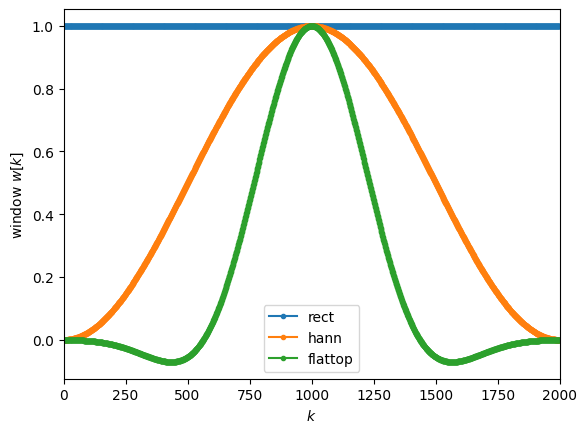

In [228]:
wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)

plt.plot(wrect, 'C0o-', ms=3, label='rect')
plt.plot(whann, 'C1o-', ms=3, label='hann')
plt.plot(wflattop, 'C2o-', ms=3, label='flattop')

plt.xlabel(r'$k$')
plt.ylabel(r'window $w[k]$')
plt.xlim(0, N)

plt.legend()
plt.show()

In [229]:
X2wrect = fft(x2)
X1wrect = fft(x1)
X3wrect = fft(x3)
X1whann = fft(x1*whann)
X2whann = fft(x2*whann)
X3whann = fft(x3*whann)
X1wflattop = fft(x1*wflattop)
X2wflattop = fft(x2*wflattop)
X3wflattop = fft(x3*wflattop)


In [230]:
def fft2db(X):
    N = X.size
    Xtmp = 2 / N * X  # independent of N, norm for sine amplitudes
    Xtmp[0] *= 1 / 2  # bin for f=0 Hz is existing only once, so cancel *2 from above
    
    if N % 2 == 0:  # fs/2 is included as a bin
        # fs/2 bin is existing only once, so cancel *2 from above
        Xtmp[N // 2] = Xtmp[N // 2] / 2
    
    return 20 * np.log10(np.abs(Xtmp))  # in dB

In [231]:
df = fs/N
f = np.arange(N)*df

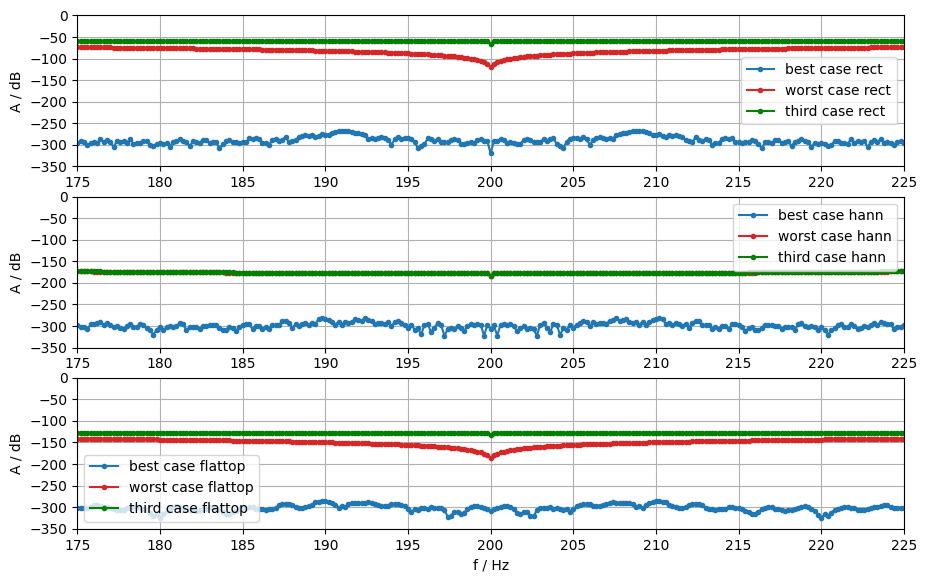

In [232]:
plt.figure(figsize=(16/1.5,10/1.5))
plt.subplot(3,1,1)
plt.plot(f,fft2db(X1wrect),'C0o-',ms=3,label='best case rect')
plt.plot(f,fft2db(X2wrect),'C3o-',ms=3,label='worst case rect')
plt.plot(f,fft2db(X3wrect),'o-', color='green',ms=3,label='third case rect')
plt.xlim(175, 225)
plt.ylim(-350, 0)
plt.xticks(np.arange(175,230,5))
plt.yticks(np.arange(-350,50,50))
plt.legend()
#xlabel('f / Hz')
plt.ylabel('A / dB')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(f,fft2db(X1whann),'C0o-',ms=3,label='best case hann')
plt.plot(f,fft2db(X2whann),'C3o-',ms=3,label='worst case hann')
plt.plot(f,fft2db(X3whann),'o-', color='green',ms=3,label='third case hann')
plt.xlim(175,225)
plt.ylim(-350, -0)
plt.xticks(np.arange(175,230,5))
plt.yticks(np.arange(-350,50,50))
plt.legend()
#xlabel('f / Hz')
plt.ylabel('A / dB')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(f,fft2db(X1wflattop),'C0o-',ms=3,label='best case flattop')
plt.plot(f,fft2db(X2wflattop),'C3o-',ms=3,label='worst case flattop')
plt.plot(f,fft2db(X3wflattop),'o-', color='green',ms=3,label='third case flattop')
plt.xlim(175,205)
plt.ylim(-350, 0)
plt.xticks(np.arange(175,230,5))
plt.yticks(np.arange(-350,50,50))
plt.legend()
plt.xlabel('f / Hz')
plt.ylabel('A / dB')
plt.grid(True)
